In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from a CSV file
file_path = 'results.csv'  # Replace with the path to your CSV file
data = pd.read_csv(file_path)
print(data)

    # epsilon  alpha  estimated_value  lower_bound  upper_bound  exact_value
0       0.001  0.005         0.168745     0.168136     0.169353     0.162276
1       0.001  0.010         0.169069     0.167245     0.170894     0.162276
2       0.001  0.015         0.168741     0.168322     0.169160     0.162276
3       0.001  0.020         0.168980     0.167396     0.170563     0.162276
4       0.001  0.025         0.167394     0.165846     0.168942     0.162276
..        ...    ...              ...          ...          ...          ...
95      0.010  0.030         0.164365     0.141908     0.186823     0.162276
96      0.010  0.035         0.167958     0.163413     0.172502     0.162276
97      0.010  0.040         0.168332     0.164050     0.172615     0.162276
98      0.010  0.045         0.166788     0.159041     0.174535     0.162276
99      0.010  0.050         0.169828     0.148573     0.191084     0.162276

[100 rows x 6 columns]


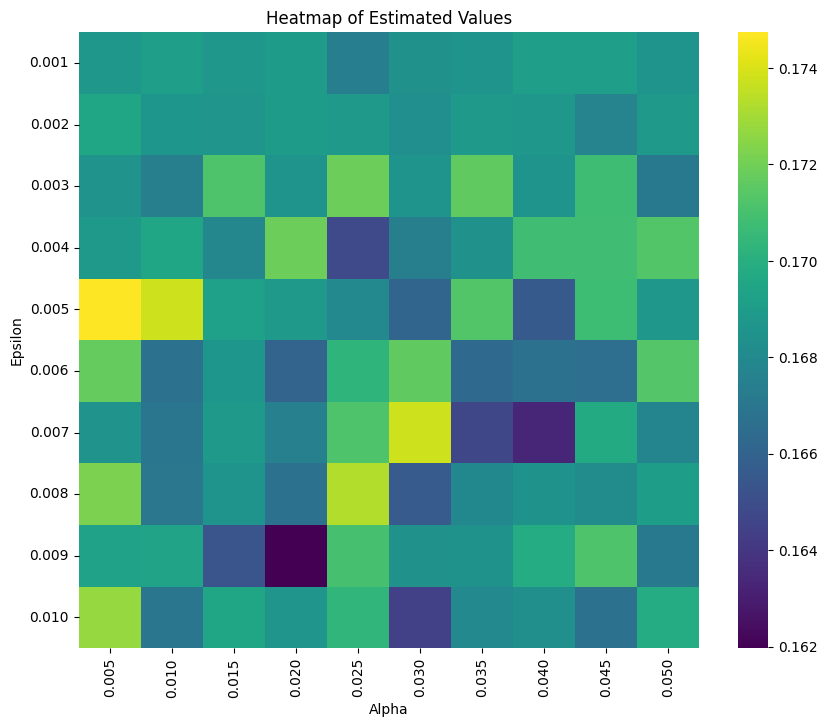

In [34]:
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
# Pivot the data for the heatmap
data_pivot = data.pivot(index="# epsilon", columns="alpha", values="estimated_value")

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
ax = sns.heatmap(data_pivot, cmap='viridis')


# Format the tick labels to two decimal places
ax.set_xticklabels(['{:.3f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])
ax.set_yticklabels(['{:.3f}'.format(float(t.get_text())) for t in ax.get_yticklabels()])



# Finalize the plot
plt.title('Heatmap of Estimated Values')
plt.xlabel('Alpha')
plt.ylabel('Epsilon')
plt.show()

In [16]:
data['half_range'] = (data['upper_bound'] - data['lower_bound']) / 2

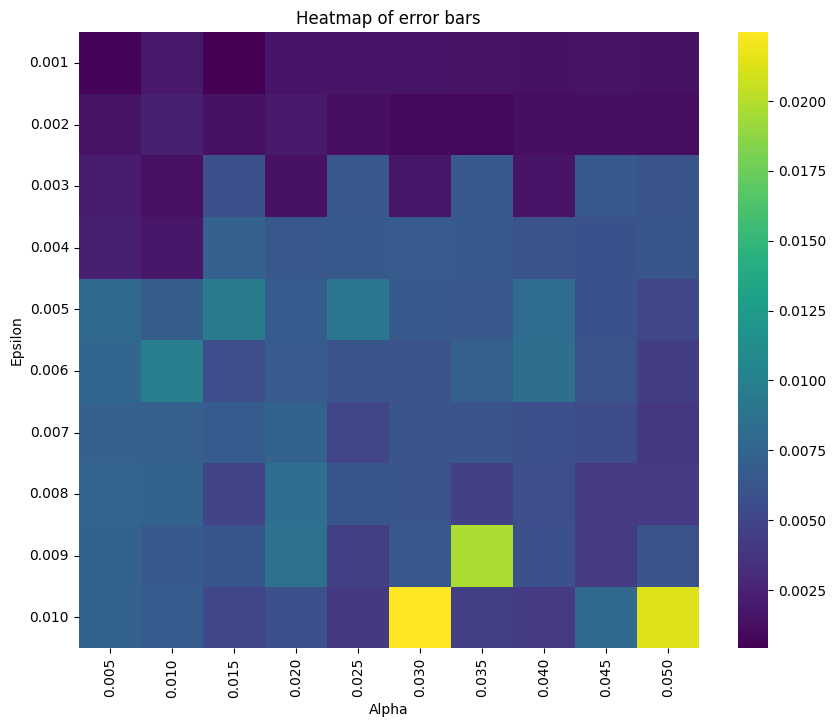

In [35]:
# Pivot the data for the heatmap
data_pivot = data.pivot(index="# epsilon", columns="alpha", values="half_range")

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
ax = sns.heatmap(data_pivot, cmap='viridis')

# Format the tick labels to two decimal places
ax.set_xticklabels(['{:.3f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])
ax.set_yticklabels(['{:.3f}'.format(float(t.get_text())) for t in ax.get_yticklabels()])
# Finalize the plot
plt.title('Heatmap of error bars')
plt.xlabel('Alpha')
plt.ylabel('Epsilon')
plt.show()

In [39]:
import pandas as pd
import seaborn as sns

oracle_calls = pd.read_csv('oracle_calls.csv')
oracle_calls["num_oracle_queries"] = oracle_calls["num_oracle_queries"].astype(int)
print(oracle_calls)

    # epsilon  alpha  num_oracle_queries
0       0.001   0.01               90500
1       0.001   0.02               21700
2       0.001   0.03               29900
3       0.001   0.04               21700
4       0.001   0.05               28100
5       0.002   0.01               22400
6       0.002   0.02               21800
7       0.002   0.03               30100
8       0.002   0.04               29600
9       0.002   0.05               38700
10      0.003   0.01               27900
11      0.003   0.02               29400
12      0.003   0.03               23200
13      0.003   0.04                7200
14      0.003   0.05                9700
15      0.004   0.01                7300
16      0.004   0.02               22800
17      0.004   0.03                7300
18      0.004   0.04                7000
19      0.004   0.05                7400
20      0.005   0.01                7300
21      0.005   0.02                7000
22      0.005   0.03                7300
23      0.005   

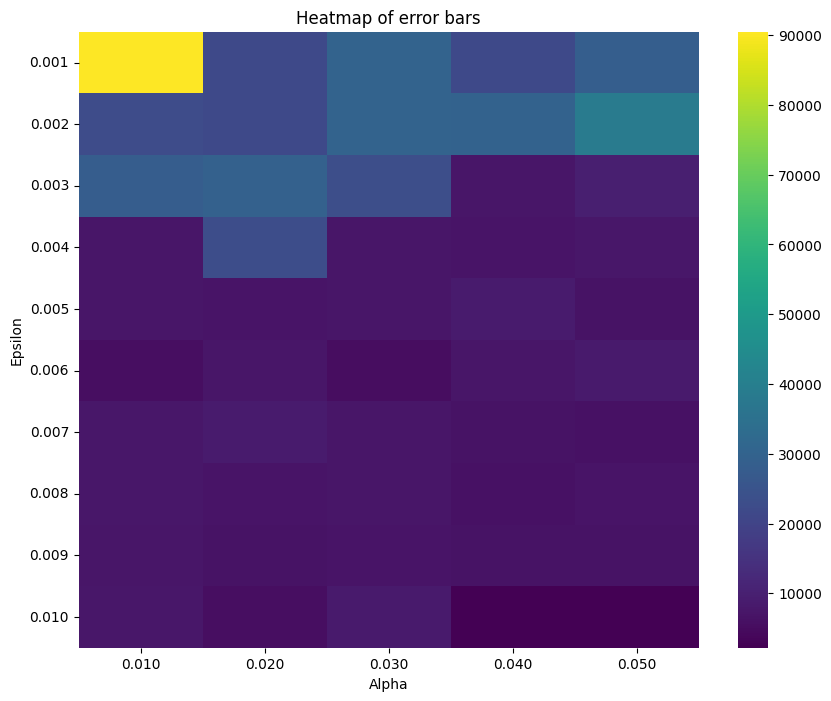

In [40]:
# Pivot the data for the heatmap
data_pivot = oracle_calls.pivot(index="# epsilon", columns="alpha", values="num_oracle_queries")

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
ax = sns.heatmap(data_pivot, cmap='viridis')

# Format the tick labels to two decimal places
ax.set_xticklabels(['{:.3f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])
ax.set_yticklabels(['{:.3f}'.format(float(t.get_text())) for t in ax.get_yticklabels()])
# Finalize the plot
plt.title('Heatmap of error bars')
plt.xlabel('Alpha')
plt.ylabel('Epsilon')
plt.show()

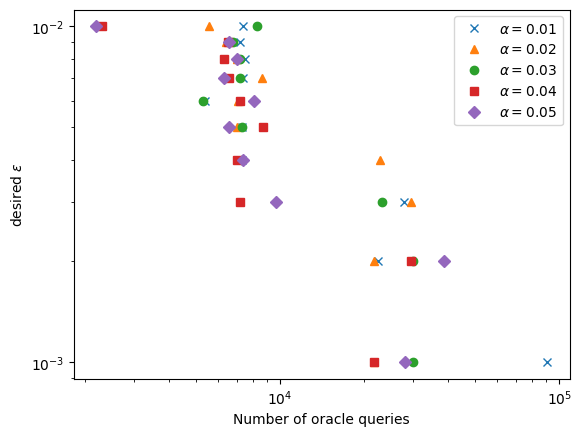

In [59]:
oracle_alpha_1 = oracle_calls[oracle_calls['alpha'] == 0.01]
oracle_alpha_2 = oracle_calls[oracle_calls['alpha'] == 0.02]
oracle_alpha_3 = oracle_calls[oracle_calls['alpha'] == 0.03]
oracle_alpha_4 = oracle_calls[oracle_calls['alpha'] == 0.04]
oracle_alpha_5 = oracle_calls[oracle_calls['alpha'] == 0.05]
# print(oracle_alpha_1)

plt.loglog(oracle_alpha_1["num_oracle_queries"], oracle_alpha_1["# epsilon"], 'x', label=r"$\alpha=0.01$")
plt.loglog(oracle_alpha_2["num_oracle_queries"], oracle_alpha_2["# epsilon"], '^', label=r"$\alpha=0.02$")
plt.loglog(oracle_alpha_3["num_oracle_queries"], oracle_alpha_3["# epsilon"], 'o', label=r"$\alpha=0.03$")
plt.loglog(oracle_alpha_4["num_oracle_queries"], oracle_alpha_4["# epsilon"], 's', label=r"$\alpha=0.04$")
plt.loglog(oracle_alpha_5["num_oracle_queries"], oracle_alpha_5["# epsilon"], 'D', label=r"$\alpha=0.05$")
plt.ylabel(r"desired $\epsilon$")
plt.xlabel("Number of oracle queries")
plt.legend()

Text(0.5, 0, 'Number of oracle queries')

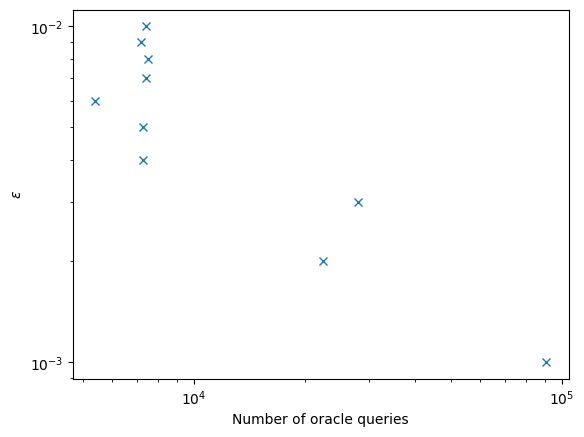

In [58]:
true_epsilon = data[data['alpha'] == 0.01]
plt.loglog(oracle_alpha_1["num_oracle_queries"],true_epsilon["# epsilon"],  'x', label=r"$\alpha=0.01$")
plt.ylabel(r"$\epsilon$")
plt.xlabel("Number of oracle queries")